### Credit Card Fraud Detection

data: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data


In [29]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# reading the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data Describesion

Time: number of seconds elapsed between this transaction and the first transaction in the dataset

V1-V28: may be result of a PCA Dimensionality reduction to protect user identities and sensitive features

Amount: Transaction Amount

Class: 1 for fraudulent transactions, 0 otherwise

In [6]:
# find missing values
df.isna().sum()
# there is no missing values in each column
# the output has been hidden
;

''

In [14]:
print(df.shape)
fraud = df[df['Class']==1]
safe = df[df['Class']==0]
print(len(fraud), len(safe))

(284807, 31)
492 284315


In [17]:
print(fraud.Amount.describe())
print(safe.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


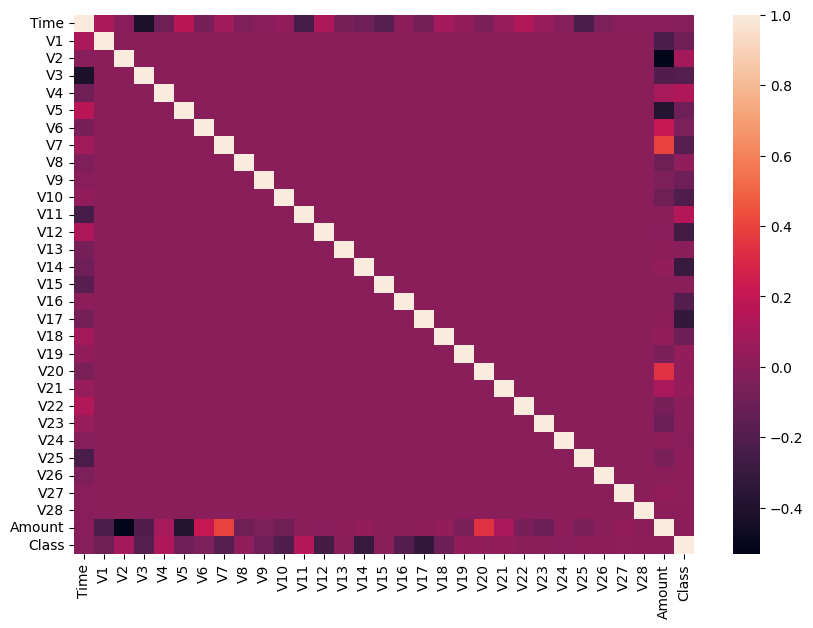

In [22]:
# correlation matrix
df_corr = df.corr()
heat_map = plt.figure(figsize = (10, 7))
sns.heatmap(df_corr)
plt.show()

The heatmap provided a sight about the correlations. There are some "high" correlated ones such as V2 and V5 has strong negative correlation with the Amount and V12 and V17 has negative correlation with the Class

In [33]:
# get independent variables and dependent variables
X = df.drop(['Class'], axis=1)
Y = df['Class']
x_data = X.values
y_data = Y.values

In [34]:
from sklearn.model_selection import train_test_split
# split the train, test data
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size = 0.2, random_state=131
)

Random Forest Model

In [39]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# fir a random forest model
r_forest = RandomForestClassifier().fit(x_train, y_train)

In [40]:
# get random forest model preditions
rf_predict = r_forest.predict(x_test)

In [52]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

# random forest model accuracy
# (TN+TP)/(All)
rf_acc = accuracy_score(y_test,rf_predict)
print("The accuracy of random forest model is", rf_acc)
# random forest model precision
# (TP)/(AllP)
rf_prec = precision_score(y_test, rf_predict)
print("The precision of random forest model is", rf_prec)
# random forest model recall
# (TP)/(TP+FN)
rf_recall = recall_score(y_test, rf_predict)
print("The recall score of random forest model is", rf_recall)
# random forest model F1 score
# 2/[(1/Recall)+(1/Precision)]
rf_f1 = f1_score(y_test, rf_predict)
print("The F1 score of random forest model is", rf_f1)


The accuracy of random forest model is 0.9994382219725431
The precision of random forest model is 0.9264705882352942
The recall score of random forest model is 0.7
The F1 score of random forest model is 0.7974683544303798


Logistic Regression Model

In [93]:
from sklearn import linear_model
log_r = linear_model.LogisticRegression().fit(x_train, y_train)

c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
# logistic regression prediction
logr_predict = log_r.predict(x_test)

In [70]:
# logistic regression model accuracy
# (TN+TP)/(All)
logr_acc = accuracy_score(y_test,logr_predict)
print("The accuracy of logistic regression model is", logr_acc)

# logistic regression model precision
# (TP)/(AllP)
logr_prec = precision_score(y_test, logr_predict)
print("The precision of logistic regression model is", logr_prec)

# logistic regression model recall
# (TP)/(TP+FN)
logr_recall = recall_score(y_test, logr_predict)
print("The recall score of logistic regression model is", logr_recall)

# logistic regression model F1 score
# 2/[(1/Recall)+(1/Precision)]
logr_f1 = f1_score(y_test, logr_predict)
print("The F1 score of logistic regression model is", logr_f1)

The accuracy of logistic regression model is 0.9989466661985184
The precision of logistic regression model is 0.6630434782608695
The recall score of logistic regression model is 0.6777777777777778
The F1 score of logistic regression model is 0.6703296703296703


Naive Bayes Model

In [90]:
from sklearn.naive_bayes import GaussianNB

# train Gaussian model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# prediction
gnb_predict = gnb.predict(x_test)
 

In [92]:
# Gaussian model accuracy
# (TN+TP)/(All)
gnb_acc = accuracy_score(y_test,gnb_predict)
print("The accuracy of Gaussian model is", gnb_acc)

# Gaussian model precision
# (TP)/(AllP)
gnb_prec = precision_score(y_test, gnb_predict)
print("The precision of Gaussian model is", gnb_prec)

# Gaussian model recall
# (TP)/(TP+FN)
gnb_recall = recall_score(y_test, gnb_predict)
print("The recall score of Gaussian model is", gnb_recall)

# Gaussian model F1 score
# 2/[(1/Recall)+(1/Precision)]
gnb_f1 = f1_score(y_test, gnb_predict)
print("The F1 score of Gaussian model is", gnb_f1)

The accuracy of Gaussian model is 0.9929602190934307
The precision of Gaussian model is 0.1288782816229117
The recall score of Gaussian model is 0.6
The F1 score of Gaussian model is 0.21218074656188604
